In [186]:
%matplotlib inline
%run analyze_traj.py
data_dir='/home/amichaut/Desktop/charlene'
df=run(data_dir,refresh=False)
df2=filter_by_traj_len(df,min_traj_len=25)

In [138]:
#### PLOT VFIELD
groups=df2.groupby('frame')
for frame in df['frame'].unique():
    plot_frame_vfield(df,groups,frame,data_dir,avg_grid=10)

plotting frame 24.0


In [30]:
#### PLOT TRAJ

# tracks=df.groupby('traj')
# long_tracks=[]
# for t in df['traj'].unique():
#     track=tracks.get_group(t)
#     if track.shape[0]==25:
#         long_tracks.append(t)
# print len(long_tracks)
z_lim=[df['z_rel'].min(),df['z_rel'].max()]
groups=df2.groupby('frame')
for frame in df['frame'].unique():
    plot_frame_cells(df2,groups,frame,data_dir,z_lim=z_lim,plot_traj=True,hide_labels=True)


plotting frame 24.0


In [60]:
#### GENERATE SYNTHETIC DATA

part_num=10
frame_num=25
x0=10;y0=10;z0=10
xmax=100;ymax=100;zmax=100;
shift=50
traj=array([]);frame=array([]);x=array([]);y=array([]);z=array([])
for i in range(part_num):
    traj=np.concatenate((traj,ones(frame_num)*i))
    frame=np.concatenate((frame,arange(frame_num)))
    x=np.concatenate((x,linspace(x0,xmax,frame_num)))
    y=np.concatenate((y,linspace(y0+i*shift,ymax+i*shift,frame_num)))
    z=np.concatenate((z,linspace(z0,zmax,frame_num)))

a=np.vstack([arange(frame_num*part_num),traj,frame,x,y,z,zeros((6,frame_num*part_num))]).T
    
df=pd.DataFrame(a,columns=['i','traj','frame','x','y','z','m0','m1','m2','m3','m4','NPscore'])
savetxt('test_data.txt',a,delimiter='\t')

[-1, 7, -1, 7]

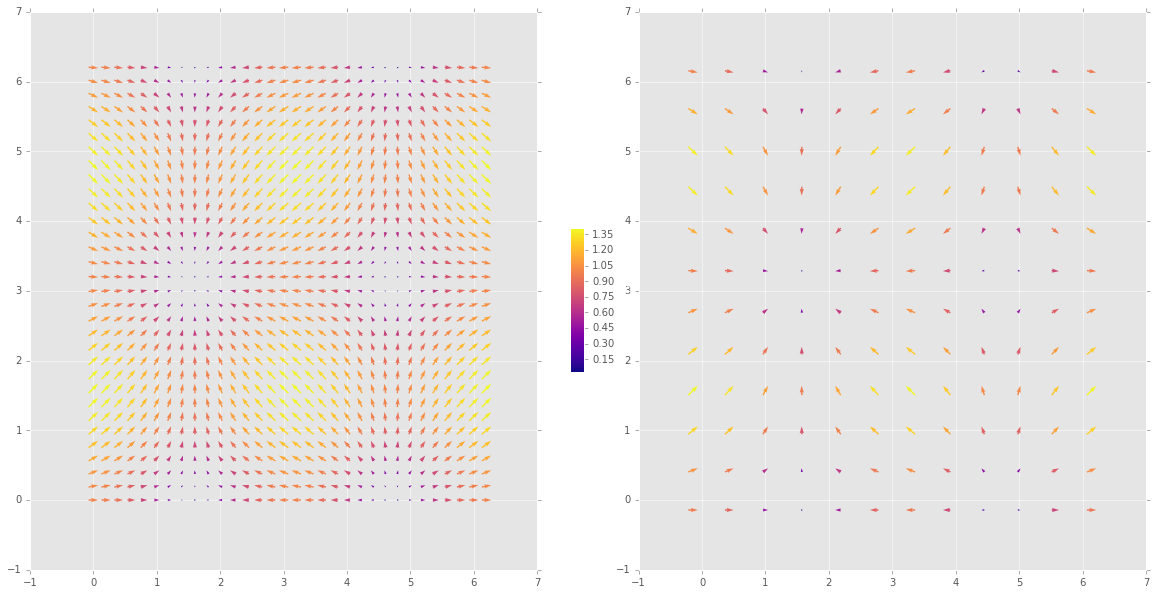

In [91]:
### TEST QUIVER

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(20, 10))
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M,
               units='x',
               pivot='mid',
               width=0.022,
               scale=1 / 0.15,
              cmap='plasma')

xmin, ymin, xmax, ymax=ax.axis()

cbaxes = fig.add_axes([0.5, 0.4, 0.01, 0.2]) 
cbar = fig.colorbar(Q,cax = cbaxes,label='$v_z\ (\mu m.min^{-1})$')
cbaxes.yaxis.label.set_color('white')
ax.axis([-1, 7, -1, 7])

### average grid

a=hstack([X.reshape(32*32,1),Y.reshape(32*32,1),U.reshape(32*32,1),V.reshape(32*32,1),M.reshape(32*32,1)])
df=pd.DataFrame(a,columns=['x','y','vx','vy','vz'])

#make subgrid
res=15
xmin, xmax, ymin, ymax = [-1, 7, -1, 7]
xsubgrid=linspace(xmin,xmax,res);ysubgrid=linspace(ymin,ymax,res)
X=[];Y=[];VX=[];VY=[];VZ=[] #new data
for i,xg in enumerate(xsubgrid[:-1]):
    for j,yg in enumerate(ysubgrid[:-1]):
        xg1=xsubgrid[i+1];yg1=ysubgrid[j+1]
        ind=((df['x']>=xg) & (df['x']<xg1) & (df['y']>=yg) & (df['y']<yg1))
        VX.append(df[ind]['vx'].mean());VY.append(df[ind]['vy'].mean());VZ.append(df[ind]['vz'].mean())
        X.append(xg+(xg1-xg)*0.5);Y.append(yg+(yg1-yg)*0.5) #center of the cell

Q = ax1.quiver(X,Y,VX,VY,VZ,
               units='x',
               pivot='mid',
               width=0.022,
               scale=1 / 0.15,
              cmap='plasma')

ax1.axis([-1, 7, -1, 7])

In [123]:
arange(1,10,1.5)

array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5])

In [146]:
avg_vfield = plot_frame_vfield(df,groups,frame,data_dir,avg_grid=10,plot_field=False)

plotting frame 24.0


In [166]:
X=[];Y=[];div=[]
x_array=avg_field['x'].unique(); y_array=avg_field['y'].unique()
for i,xi in enumerate(x_array[1:-1]):
    i+=1
    dx=x_array[i+1]-xi
    for j,yj in enumerate(y_array[1:-1]):
        j+=1 # indices starts at 0 instead of 1
        dy=y_array[j+1]-yj
        vx1=avg_field[((avg_vfield['x']==x_array[i+1]) & (avg_vfield['y']==yj))]['vx'].values[0]
        vx_1=avg_field[((avg_vfield['x']==x_array[i-1]) & (avg_vfield['y']==yj))]['vx'].values[0]
        vy1=avg_field[((avg_vfield['y']==y_array[j+1]) & (avg_vfield['x']==xi))]['vy'].values[0]
        vy_1=avg_field[((avg_vfield['y']==y_array[j-1]) & (avg_vfield['x']==xi))]['vy'].values[0]
        Dvx=(vx1-vx_1)/(2*dx);Dvy=(vy1-vy_1)/(2*dy)
        #print dx,dy,
        X.append(xi);Y.append(yj);div.append(Dvx+Dvy)

In [201]:
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
M = np.hypot(U, V)
print Y


[[ 0.   0.   0.  ...,  0.   0.   0. ]
 [ 0.2  0.2  0.2 ...,  0.2  0.2  0.2]
 [ 0.4  0.4  0.4 ...,  0.4  0.4  0.4]
 ..., 
 [ 5.8  5.8  5.8 ...,  5.8  5.8  5.8]
 [ 6.   6.   6.  ...,  6.   6.   6. ]
 [ 6.2  6.2  6.2 ...,  6.2  6.2  6.2]]


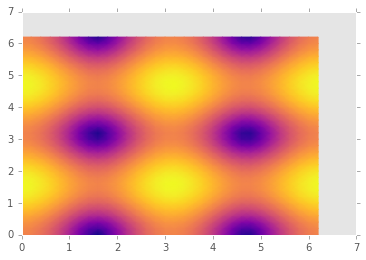

In [199]:
fig=figure()
ax=gca()
ax.pcolormesh(X,Y,M,cmap=cm.plasma,shading='gouraud',alpha=1)

plotting frame 2 (48, 8) (48, 8) (48, 8)


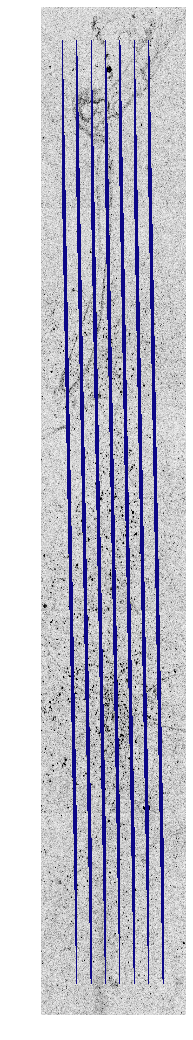

In [205]:
%run analyze_traj.py
plot_frame_div(avg_vfield,2,data_dir)

In [176]:
data=np.random.randn(4,4)